In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1=pd.read_excel('Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data2=pd.read_excel('Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

encoded_data1=pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

Y1_=data1['Milk Production/Day']
data1=data1.drop(['Breed','Milk Production/Day'],axis=1)

data1=data1.join(encoded_data1)
data1=data1.join(Y1_)

encoded_data2=pd.DataFrame(encoder.fit_transform(data2[['Month','District','Zone','Green \nFodder','Dry\n Fodder']]).toarray())
Y2_=data2['Farm Milk Production per \nDay']
data2=data2.drop(['Month','District','Zone','Green \nFodder','Dry\n Fodder','Farm Milk Production per \nDay'],axis=1)

data2=data2.join(encoded_data2)
data2=data2.join(Y2_)

data2=data2.to_numpy()
X2=data2[:,0:-1]
Y2=data2[:,-1]

In [4]:
data1=data1.to_numpy()
X1=data1[:,0:-1]
Y1=data1[:,-1]

In [5]:
Tdata1=pd.read_excel('TDataIn.xlsx', sheet_name=0, usecols="B:E,H:I")
Tdata2=pd.read_excel('TDataEx.xlsx', sheet_name=0, usecols="B:P")

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

Tencoded_data1=pd.DataFrame(encoder.fit_transform(Tdata1[['Breed']]).toarray())

TY1_=Tdata1['Milk Production/Day']
Tdata1=Tdata1.drop(['Breed','Milk Production/Day'],axis=1)

Tdata1=Tdata1.join(Tencoded_data1)
Tdata1=Tdata1.join(TY1_)

Tencoded_data2=pd.DataFrame(encoder.fit_transform(Tdata2[['Month','District','Zone','Green \nFodder','Dry\n Fodder']]).toarray())
TY2_=Tdata2['Farm Milk Production per \nDay']
Tdata2=Tdata2.drop(['Month','District','Zone','Green \nFodder','Dry\n Fodder','Farm Milk Production per \nDay'],axis=1)

Tdata2=Tdata2.join(Tencoded_data2)
Tdata2=Tdata2.join(TY2_)

# print(Tdata1)
# print(Tdata2)

Tdata2=Tdata2.to_numpy()
TX2=Tdata2[:,0:-1]
TY2=Tdata2[:,-1]

Tdata1=Tdata1.to_numpy()
TX1=Tdata1[:,0:-1]
TY1=Tdata1[:,-1]

# print(TX1)
# print(TX2)

farmSize=[]
for i in TX2:
    farmSize.append(i[8])
      
    

In [6]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.01, random_state = 0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.01, random_state = 0)

X1_test=TX1
Y1_test=TY1

X2_test=X2[-18:]
Y2_test=TY2

print(Y2_test)

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error,r2_score
# print(X2_test)


# For Intrinsic.
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(X1_train)
x_test_trans = poly.transform(X1_test)
lr = LinearRegression()
lr.fit(x_train_trans, Y1_train)
y_pred = lr.predict(x_test_trans)
# print(y_pred)

# For Extrinsic.
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans2 = poly.fit_transform(X2_train)
x_test_trans2 = poly.transform(X2_test)
lr2 = LinearRegression()
lr2.fit(x_train_trans2, Y2_train)
y_pred2 = lr2.predict(x_test_trans2)

# print(y_pred2)

# print(r2_score(Y2_test, y_pred2))


[ 10.   11.   20.   47.    4.5  15.   23.  100.   18.   13.   20.   14.
  16.    8.   20.   17.    9.    3. ]


4.012316002910439
92
[14.219575601823786, 13.778467834490824, 13.347102770248107, 12.925480409095634, 12.513600751033401, 12.111463796061422, 11.719069544179678, 11.336417995388183, 10.963509149686933, 10.600343007075924, 10.24691956755516, 9.903238831124643, 9.569300797784368, 9.24510546753434, 8.930652840374554, 8.625942916305013, 8.330975695325717, 8.045751177436665, 7.7702693626378565, 7.504530250929292, 7.248533842310973, 7.0022801367828995, 6.765769134345067, 6.539000834997482, 6.32197523874014, 6.114692345573043, 5.917152155496189, 5.72935466850958, 5.551299884613216, 5.382987803807096, 5.224418426091219, 5.075591751465589, 4.936507779930201, 4.807166511485059, 4.68756794613016, 4.5777120838655065, 4.477598924691096, 4.387228468606931, 4.30660071561301, 4.235715665709333, 4.174573318895901, 4.123173675172712, 4.081516734539768, 4.049602496997071, 4.027430962544616, 4.0150021311824045, 4.012316002910439, 4.019372577728717, 4.036171855637239, 4.062713836636005, 4.098998520725018]


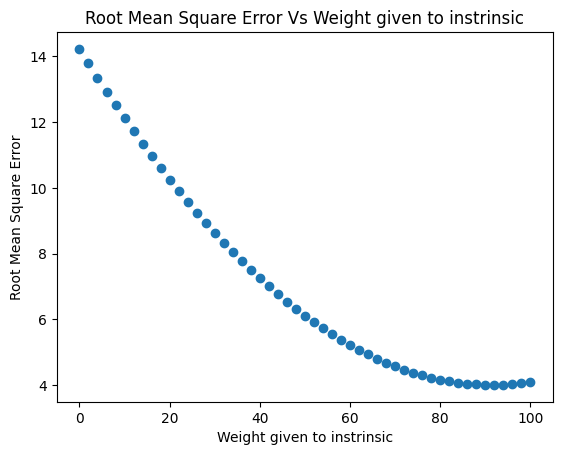

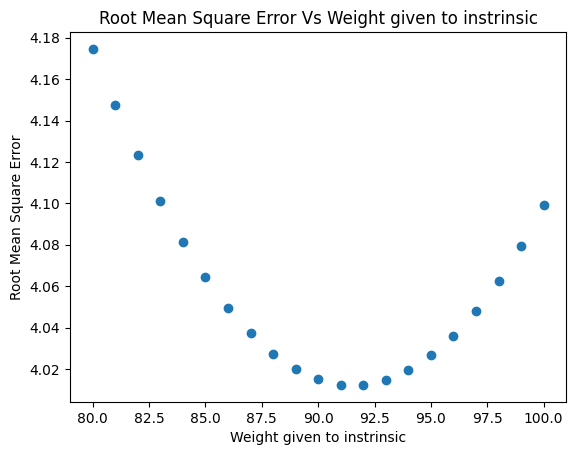

In [7]:
weight=-1
error=6000000


from sklearn.metrics import mean_squared_error,r2_score

for i in range(0,101):
    wIn=i
    wEx=100-i
    lower=0
    y_predictW=[]
    for idx in range(len(farmSize)):
        upper=lower+int(farmSize[idx])
        sum=0
        for farmIdx in range(lower,upper):
            sum+=y_pred[farmIdx]

        weightedAvg=(sum*wIn+y_pred2[idx]*wEx)/100
        
        for farmIdx in range(lower,upper):
            y_predictW.append(y_pred[farmIdx]*(weightedAvg/sum))
        lower=upper 
        
    if error > mean_squared_error(y_predictW,Y1_test):
        error = mean_squared_error(y_predictW,Y1_test)
        weight=i;
    
print(error)
print(weight)